<a href="https://colab.research.google.com/github/karloxkronfeld/covid19/blob/master/latinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from pylab import *
from matplotlib import animation,rc
from IPython.display import HTML
from imageio import imread

In [2]:
covid=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
covid.drop(covid.columns[[0,2,3]],axis=1,inplace=True)
covid=covid.groupby(covid.columns[0]).sum()

In [40]:
lista_paises=["Argentina","Bolivia", "Brazil","Chile", "Colombia",
           "Cuba","Ecuador", "Guatemala",
           "Haiti", "Honduras", "Mexico", "Nicaragua",
           "Paraguay","Peru", "Uruguay","Venezuela"
            ]
dic_paises={lista_paises[i]:i for i in range(len(lista_paises))}

In [15]:
banderas=[]
for i in range(len(lista_paises)):
  banderas.append(imread("https://github.com/karloxkronfeld/Banderas/blob/master/banderas/"+lista_paises[i]+".png?raw=true"))

In [41]:
covid=covid.loc[lista_paises]
fechas=pd.to_datetime(covid.columns[39:])  ###[:]CAMBIAR FECHA INICIO

In [42]:
def pais_latino(pais):
  latino=pd.DataFrame(columns=["pais","fecha","casos"])
  latino.casos=covid.loc[pais][39:].values
  latino.pais=pais 
  latino.fecha=pd.to_datetime(fechas)
  return latino

americaLatina=[]
for i in range(len(lista_paises)):
  americaLatina.append(pais_latino(lista_paises[i]))
datos=pd.concat(americaLatina,ignore_index=1)

In [43]:
import random
cmap=get_cmap("tab20")
colores={covid.index[i]:cmap(i) for i in range(len(covid))}
fuentes=['cmmi10', 'Liberation Mono', 'cmr10', 'cmmi10', 'Liberation Sans', 'Humor Sans',
 'DejaVu Sans',  'cmss10', 'cmtt10', 'cmb10',  'Humor Sans','Humor Sans','Humor Sans', 'Humor Sans', 'DejaVu Serif',
  'cmss10', 'Liberation Sans Narrow']
dic_fuentes={lista_paises[i]:random.choice(fuentes) for i in range(len(lista_paises))}
fuentes=matplotlib.font_manager.fontManager.ttflist

In [44]:
# banderas[dic_paises[funcion1.pais[funcion1.index[0]]]]

In [45]:
# funcion1=datos[datos.fecha.eq(fechas[100])].sort_values("casos")[-10:]

In [602]:
def CarreraLat(year):    
  funcion=datos[datos.fecha.eq(year)].sort_values("casos")[-10:]
  ax.clear()
  ax.barh(funcion.pais,funcion.casos,color=[colores[x] for x in funcion.pais])
  ax.set_yticks([])
  ax.xaxis.set_ticks_position('top')
  ax.grid(which='major', axis='x', linestyle='dashed',color="k") #grid
  ax.set_axisbelow(True) #llevar el grid al fondo
  ax.text(0, 1.10, 'Paises con mas contagiados en America Latina',transform=ax.transAxes, size=20, weight=600, ha='left')
  ax.text(0, 1.06, '# Infectados por COVID', transform=ax.transAxes, size=12, color='#777777') #letrero
  ax.text(1, 0, 'by Graphic Race', transform=ax.transAxes, ha='right', color='#777777', bbox=dict(facecolor='white', alpha=0.3, edgecolor='white'))
  ax.text(x=1, y=0.1,s="{}".format(pd.to_datetime(year).strftime("%b-%d")),transform=ax.transAxes,size=55,ha='right',weight=700) 


  flag=[]
  for i in range(len(funcion.pais)):
    flag.append(banderas[dic_paises[funcion.pais[funcion.index[i]]]])
 
  for i,(casos,pais,bandera) in enumerate(zip(funcion.casos,funcion.pais,flag)):
    ax.text(casos*1.01,i-0.4,f"{casos:,.0f}",size=14)   #CASOS
    ax.text(casos,i-0.4,pais,ha="right",color="k",va="bottom",size=23,name=dic_fuentes[pais]) #PAIS

    derecha=casos+max(funcion.casos)/11
    arriba=-0.41+i
    abajo=arriba+0.8
    
    ax.imshow(bandera,extent=[casos,derecha,arriba,abajo],aspect="auto") 
    
    ax.set_visible(True) 
    xlim(0,max(funcion.casos)*1.1)
    ylim(-0.5,10)
  
  box(False)


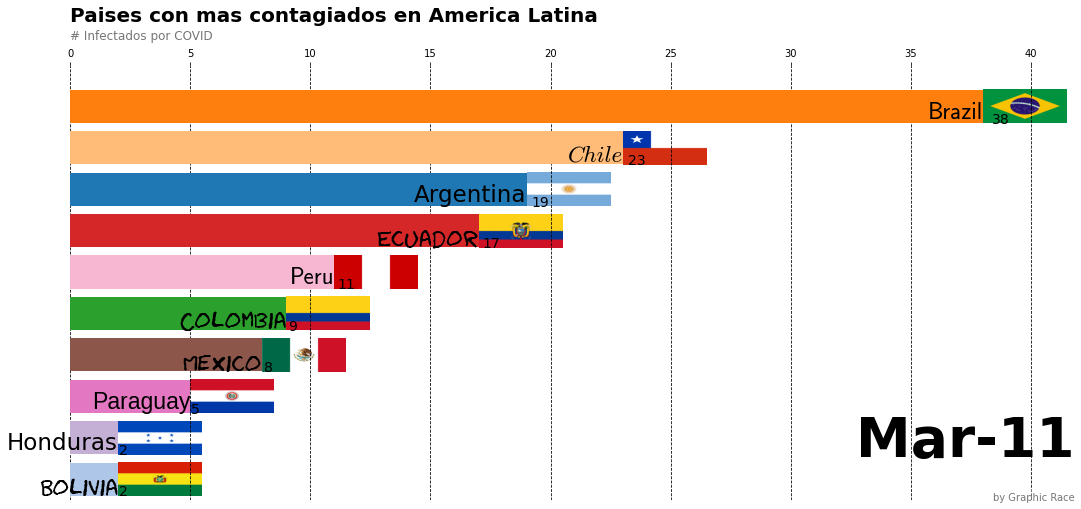

In [603]:
fig_lat,ax=subplots(figsize=(18,8))
CarreraLat(fechas[10])

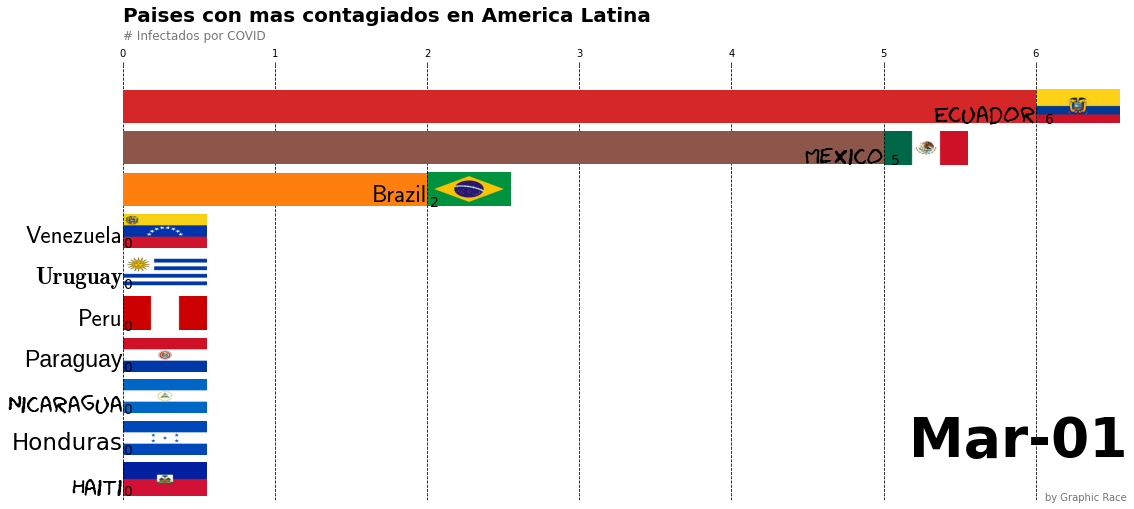

In [604]:
fig_lat,ax=subplots(figsize=(18,8))
frames=sorted(datos.fecha.unique())
anim_lat=animation.FuncAnimation(fig_lat,CarreraLat,frames=frames,interval=1000)
rc("animation",ffmpeg_path="/usr/bin/ffmpeg")
HTML(anim_lat.to_html5_video())

TypeError: ignored